In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, _tree


In [3]:
df = pd.read_csv('credit_risk_dataset.csv')


# Check for nans

In [3]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
df.shape

(32581, 12)

# Histograms and plots

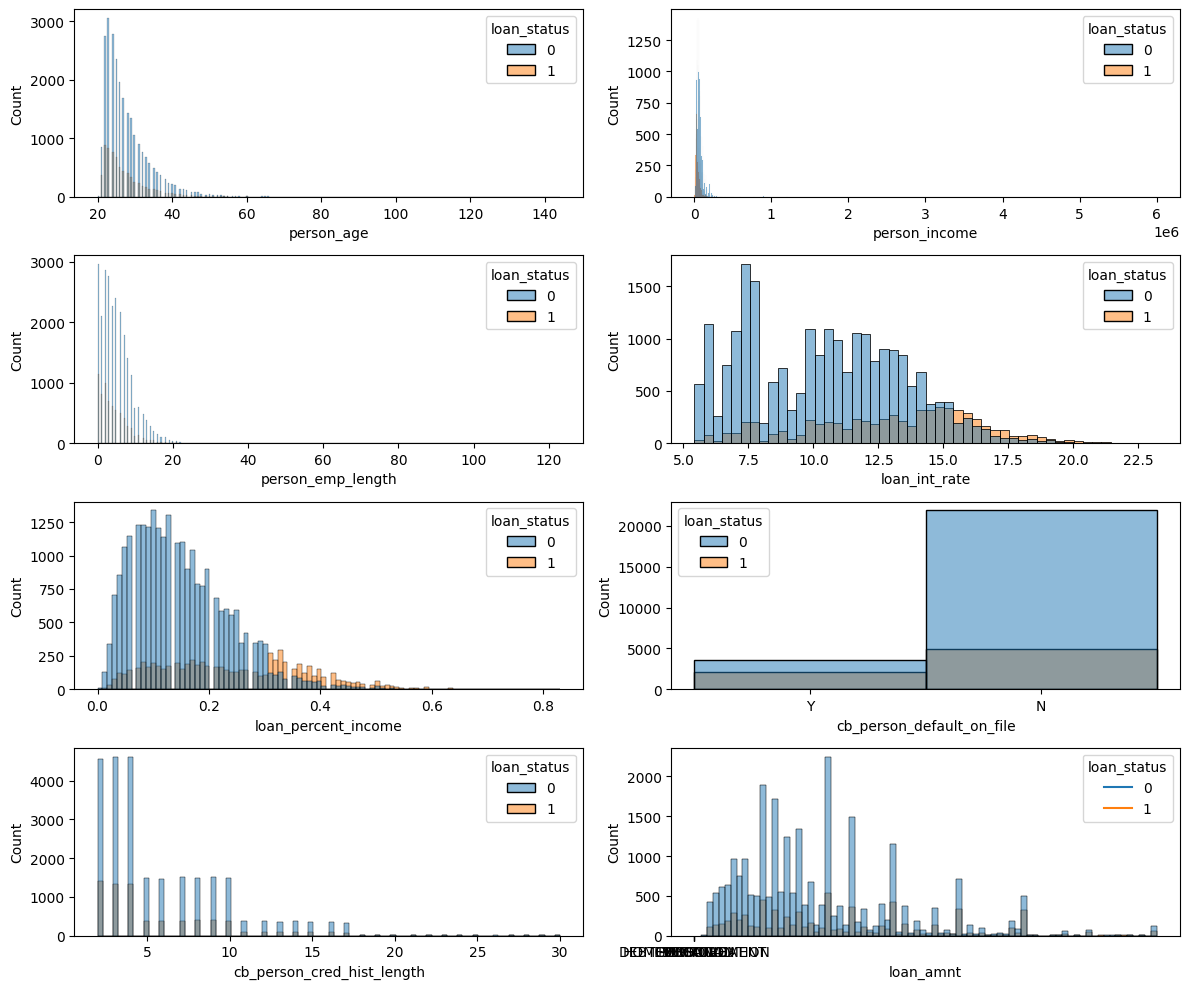

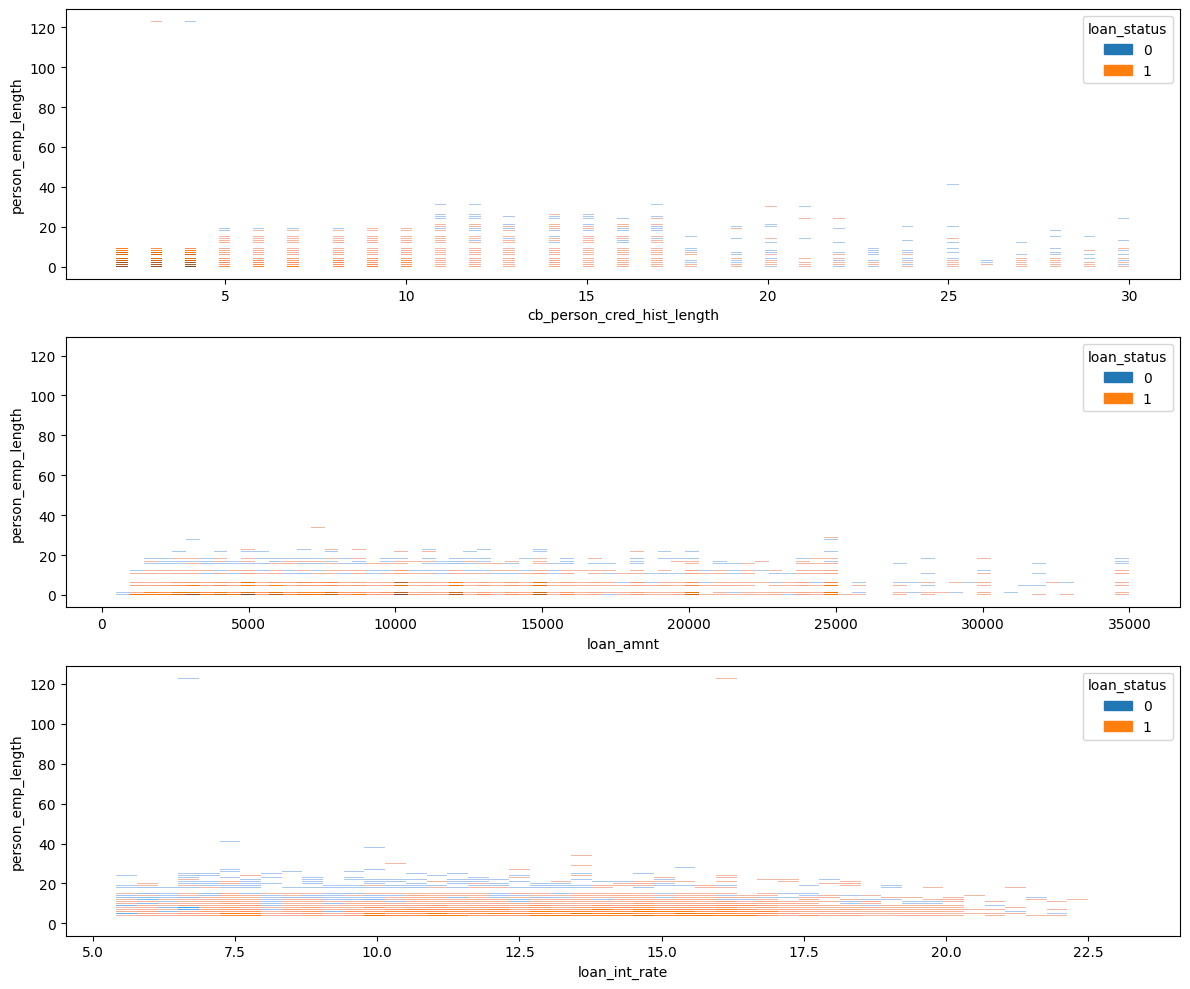

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the DataFrame

# Define common parameters for histplot
common_params = {
    "element": "step",
    "fill": False,
    "cumulative": False,
    "stat": "density",
    "common_norm": False
}

# List of variables for basic histplots
variables = [
    "person_age", "person_income", "person_emp_length",
    "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
    "cb_person_cred_hist_length", "loan_amnt"
]

# Set up the figure size and subplots
plt.figure(figsize=(12, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)  # Adjust the grid dimensions accordingly
    sns.histplot(data=df, x=var, hue="loan_status")

# Special cases with additional parameters
plt.subplot(4, 2, 8)
sns.histplot(data=df, x="loan_intent", hue="loan_status", **common_params)

# Adjust layout to avoid overlap and show the plots
plt.tight_layout()
plt.show()

# More complex plots can be in another figure if needed
plt.figure(figsize=(12, 10))
variables_2d = [
    ("cb_person_cred_hist_length", "person_emp_length"),
    ("loan_amnt", "person_emp_length"),
    ("loan_int_rate", "person_emp_length")
]

for i, (x_var, y_var) in enumerate(variables_2d, 1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df, x=x_var, y=y_var, hue="loan_status", **common_params)

# Display the second set of plots
plt.tight_layout()
plt.show()


<Axes: xlabel='loan_amnt', ylabel='Density'>

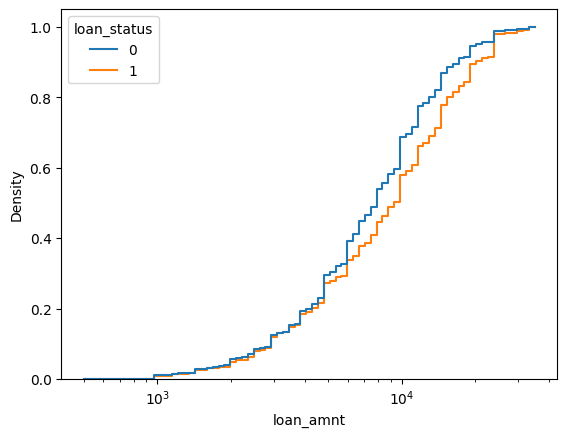

In [68]:
sns.histplot(data =df, x ="loan_amnt", hue='loan_status',
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False)

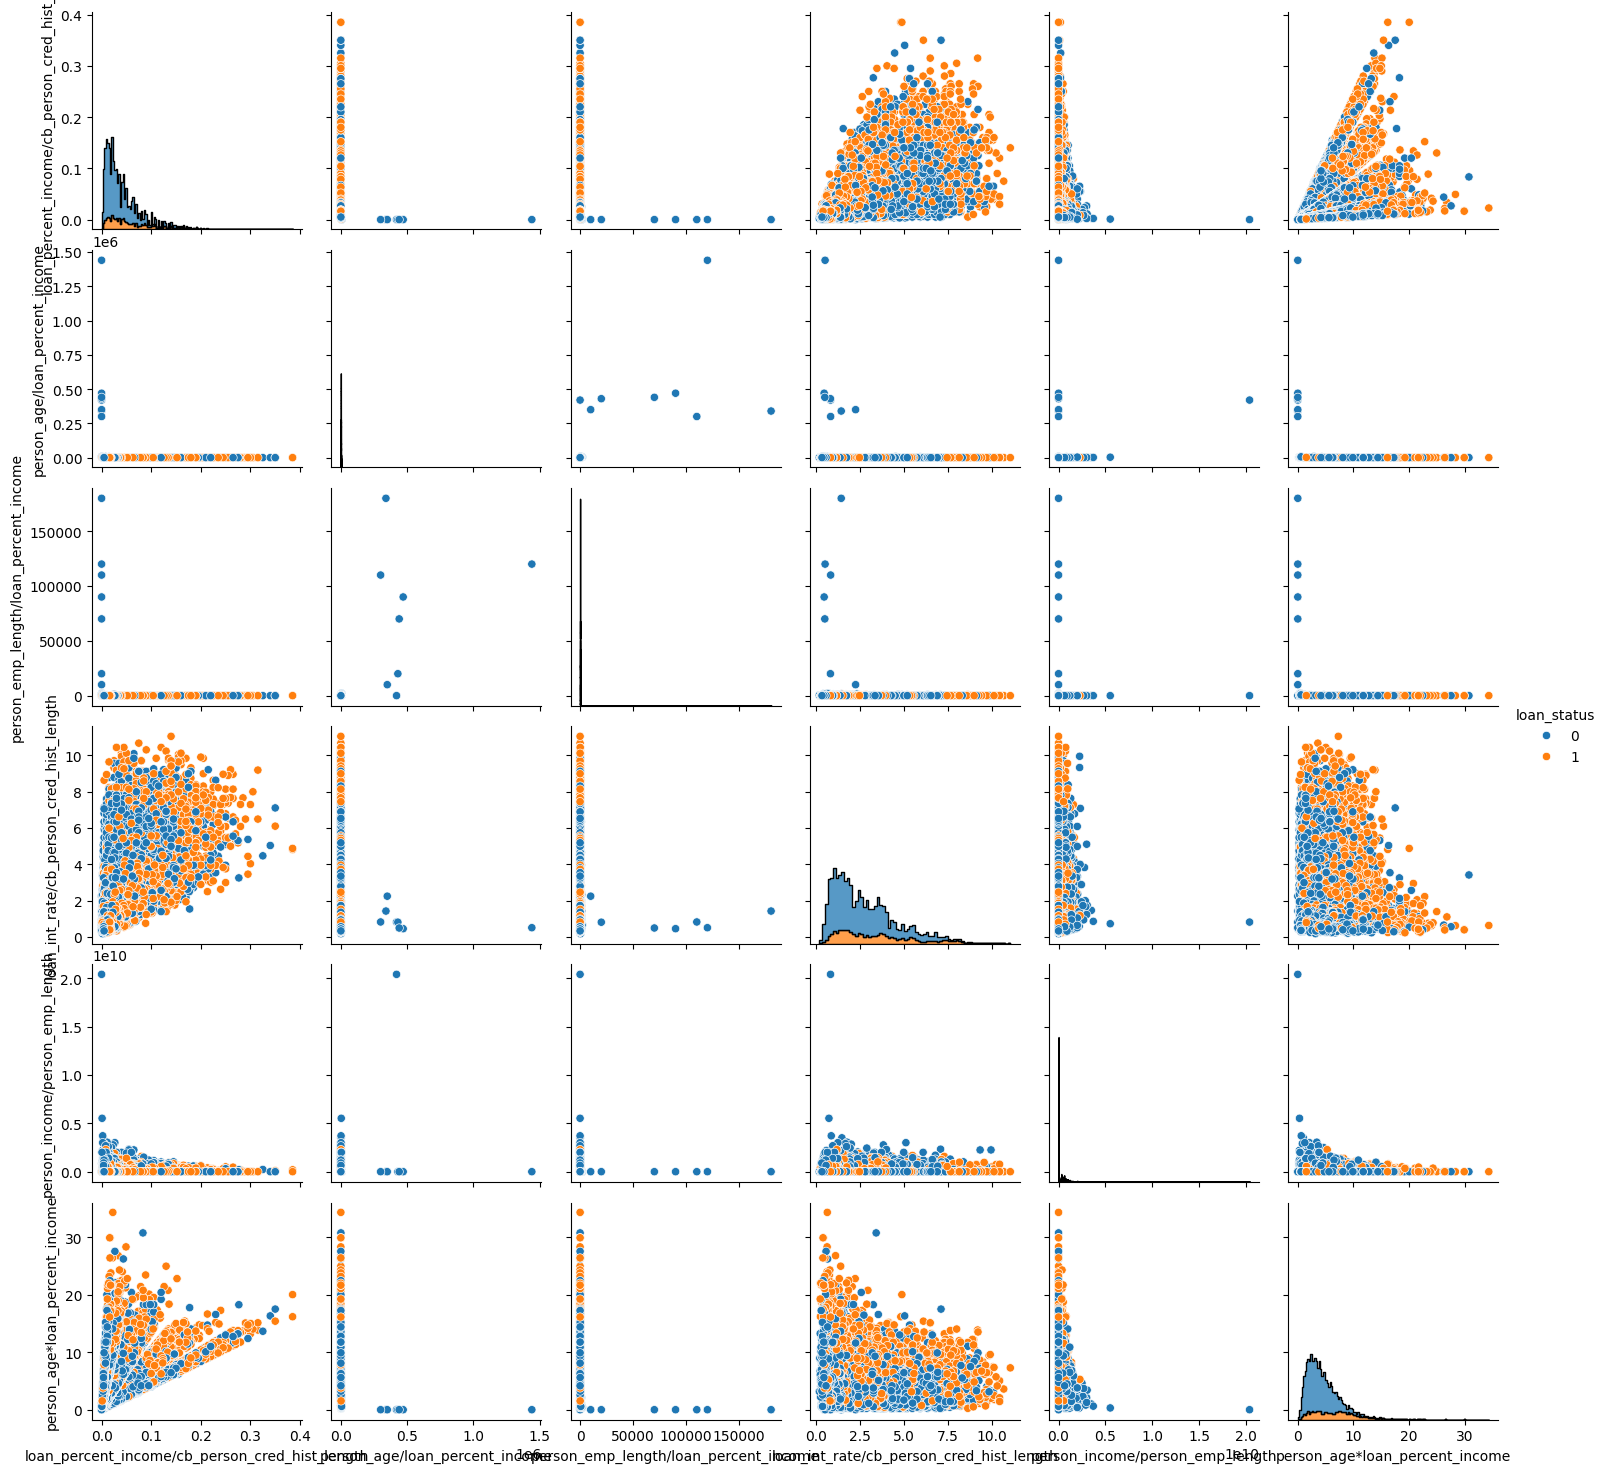

In [88]:
g = sns.PairGrid(data[FULL_Features], hue="loan_status")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Information Value

In [4]:
CAT =  ['person_home_ownership', 'loan_intent', "loan_grade","cb_person_default_on_file"]
Target = ['loan_status']
num = ['person_age', 'person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [14]:
df[Target].value_counts()

loan_status
0              25473
1               7108
Name: count, dtype: int64

<Axes: >

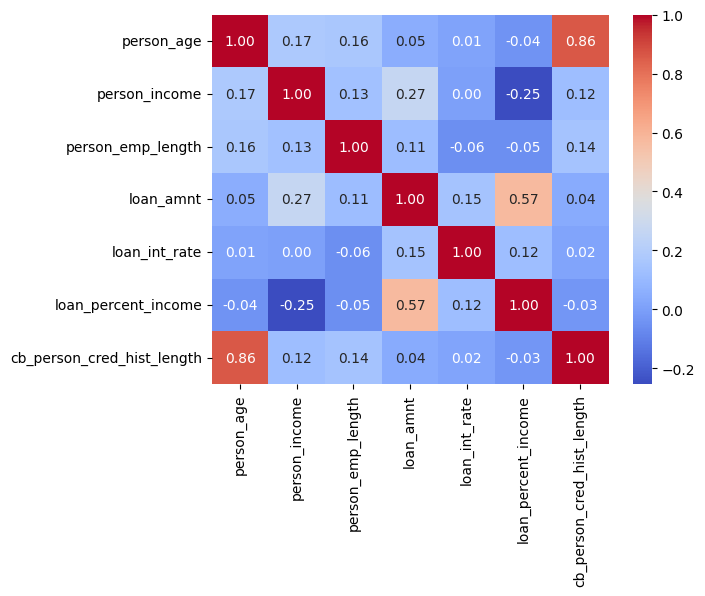

In [12]:

sns.heatmap(df[num].corr(), annot=True, fmt=".2f", cmap='coolwarm')


# Cramer's Heatmap

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
def create_cramers_v_matrix(df):
    df['loan_status'] =  df['loan_status'].astype('object')
    cols = df.select_dtypes(include=['category', 'object']).columns
    cramers = pd.DataFrame(index=cols, columns=cols, dtype=float)
    for col1 in cols:
        for col2 in cols:
            cramers.loc[col1, col2] = cramers_v(df[col1], df[col2])
    np.fill_diagonal(cramers.values, 1)  # Fill diagonal with 1s for self-comparison
    return cramers

# Assuming df is your DataFrame
cramers_v_matrix = create_cramers_v_matrix(df)


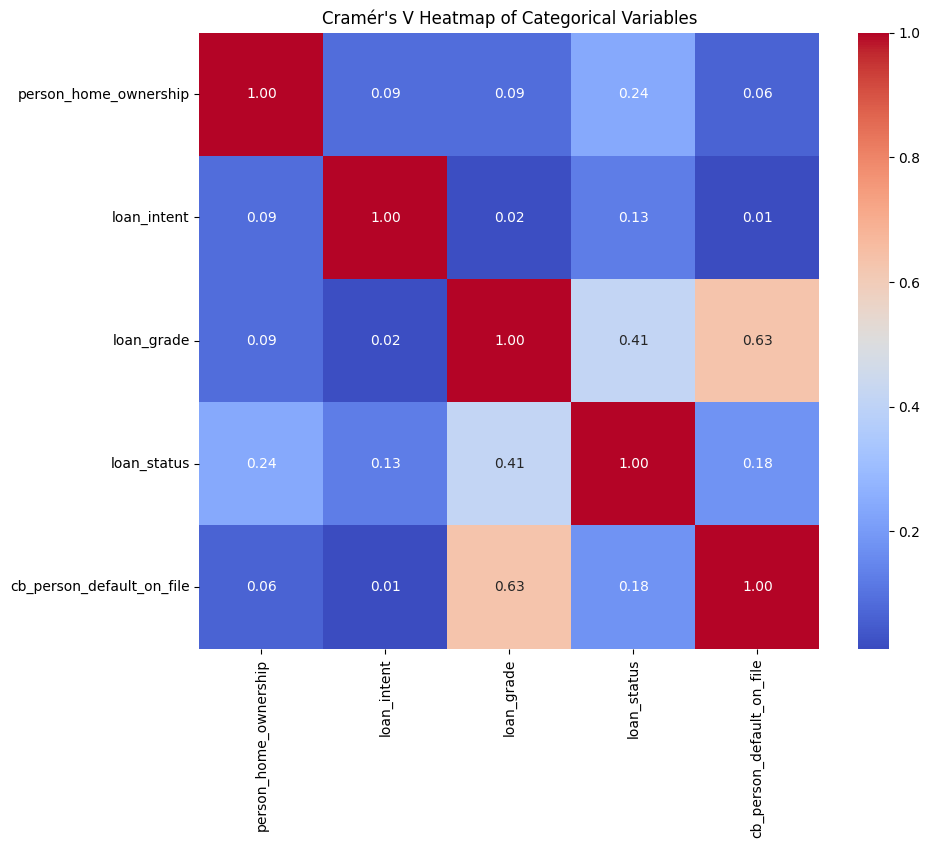

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cramér\'s V Heatmap of Categorical Variables')
plt.show()


# Create

In [ ]:
CAT =  ['person_home_ownership', 'loan_intent', "loan_grade","cb_person_default_on_file"]
Target = ['loan_status']
numeric = ['person_age', 'person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

from itertools import combinations

def create_features(data, numeric):
    # Generate all pairwise combinations of numeric features for interaction and ratio
    data = data.dropna()
    for comb in combinations(numeric, 2):
        # Interaction term
        data[f'{comb[0]}*{comb[1]}'] = data[comb[0]] * data[comb[1]]
        # Ratio term, avoid division by zero
        data[f'{comb[0]}/{comb[1]}'] = data[comb[0]] / (data[comb[1]] + 0.0001)
    return data

data = create_features(df, numeric)


In [6]:
data.isna().sum()

person_age                                        0
person_income                                     0
person_home_ownership                             0
person_emp_length                                 0
loan_intent                                       0
loan_grade                                        0
loan_amnt                                         0
loan_int_rate                                     0
loan_status                                       0
loan_percent_income                               0
cb_person_default_on_file                         0
cb_person_cred_hist_length                        0
person_age*person_income                          0
person_age/person_income                          0
person_age*person_emp_length                      0
person_age/person_emp_length                      0
person_age*loan_amnt                              0
person_age/loan_amnt                              0
person_age*loan_int_rate                          0
person_age/l

In [49]:
def calculate_iv(df, feature, target):
    """
    Calculate the information value (IV) of a feature in a dataset,
    with added diagnostics to troubleshoot issues with the data or calculations.

    Parameters:
    df (pandas.DataFrame): the dataset
    feature (str): the name of the feature to calculate IV for
    target (str): the name of the target variable

    Returns:
    float: the information value (IV) of the feature
    """
    df = df[[feature, target]].dropna()
    n = df.shape[0]
    good = df[target].sum()
    bad = n - good

    # Early exit if there are no good or bad cases, which could corrupt further calculations.
    if good == 0 or bad == 0:
        print("Warning: No positive or negative cases available.")
        return 0

    unique_values = df[feature].unique()
    iv = 0
    for value in unique_values:
        n1 = df[df[feature] == value].shape[0]
        good1 = df[(df[feature] == value) & (df[target] == 1)].shape[0]
        bad1 = n1 - good1

        if good1 == 0 or bad1 == 0:
            #print(f"Skipping value {value} with good1 {good1} or bad1 {bad1}")
            continue

        good_rate = (good1 + 1e-10) / (good + 1e-10)
        bad_rate = (bad1 + 1e-10) / (bad + 1e-10)

        # Check before taking the log
        if good_rate <= 0 or bad_rate <= 0:
            #print(f"Invalid rates for log: good_rate={good_rate}, bad_rate={bad_rate}")
            continue

        woe = np.log(good_rate / bad_rate)
        iv_contribution = (good_rate - bad_rate) * woe
        iv += iv_contribution
        #print(f"Value: {value}, WoE: {woe}, IV contribution: {iv_contribution}")

    return iv

# Example usage
try:
    iv = calculate_iv(data.copy(), 'loan_percent_income/cb_person_cred_hist_length', 'loan_status')
    print("IV:", iv)
except Exception as e:
    print(f"An error occurred: {e}")


IV: 0.982689613463534


# IV for numerical combined features

In [52]:
iv_values = {}
for feature in data.columns:
    if '*' in feature or '/' in feature:  # filter to only ratio/interaction features
        iv_values[feature] = calculate_iv(data, feature, "loan_status")

# Sort features by IV in descending order
sorted_iv = sorted(iv_values.items(), key=lambda x: x[1], reverse=True)
for feature, iv in sorted_iv:
    print(feature, iv)


loan_percent_income/cb_person_cred_hist_length 0.982689613463534
person_age/loan_percent_income 0.9759718425128102
person_emp_length/loan_percent_income 0.9048418972126719
loan_int_rate/cb_person_cred_hist_length 0.8808599119397342
person_income/person_emp_length 0.8572301248930054
loan_int_rate*cb_person_cred_hist_length 0.8526933495493512
person_age*loan_percent_income 0.850329783114087
person_age/loan_int_rate 0.8458595101048396
person_age*loan_int_rate 0.8433235550138057
person_income/cb_person_cred_hist_length 0.8406748228204557
loan_amnt/loan_percent_income 0.8380645460195375
person_emp_length/loan_int_rate 0.795132300502838
person_emp_length*loan_int_rate 0.7659863605271239
loan_int_rate*loan_percent_income 0.7424600720458857
person_age*person_income 0.7385535405330698
person_age/person_income 0.7311121963809687
person_income*loan_percent_income 0.7166301521151219
loan_int_rate/loan_percent_income 0.7144325771187695
person_income/loan_percent_income 0.7037197569727249
loan_amnt*

# IV for categorical variables

In [58]:
iv_values = {}
for feature in CAT:
    # filter to only ratio/interaction features
    iv_values[feature] = calculate_iv(data, feature, "loan_status")

# Sort features by IV in descending order
sorted_iv = sorted(iv_values.items(), key=lambda x: x[1], reverse=True)
for feature, iv in sorted_iv:
    print(feature, iv)


loan_grade 0.9204414463253546
person_home_ownership 0.37835293049373897
cb_person_default_on_file 0.16998819509913815
loan_intent 0.09788586840384642


In [106]:
top_features_num = [
    "loan_percent_income/cb_person_cred_hist_length",
    "person_age/loan_percent_income",
    "person_emp_length/loan_percent_income",
    "loan_int_rate/cb_person_cred_hist_length",
    "person_income/person_emp_length",
    "person_age*loan_percent_income"]
top_features_cat = ["loan_grade", "person_home_ownership"]
FULL_Features = top_features_cat + top_features_num + Target

# One-hot encoding categorical variables

In [107]:
df_encoded  = pd.get_dummies(data=data[FULL_Features], columns = top_features_cat, drop_first = True )
X = df_encoded.drop(Target, axis=1)
y = df_encoded[Target].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, shuffle=True, random_state=0)



# Model : Decision Tree Classifier

In [109]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=1000)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_split=1000)

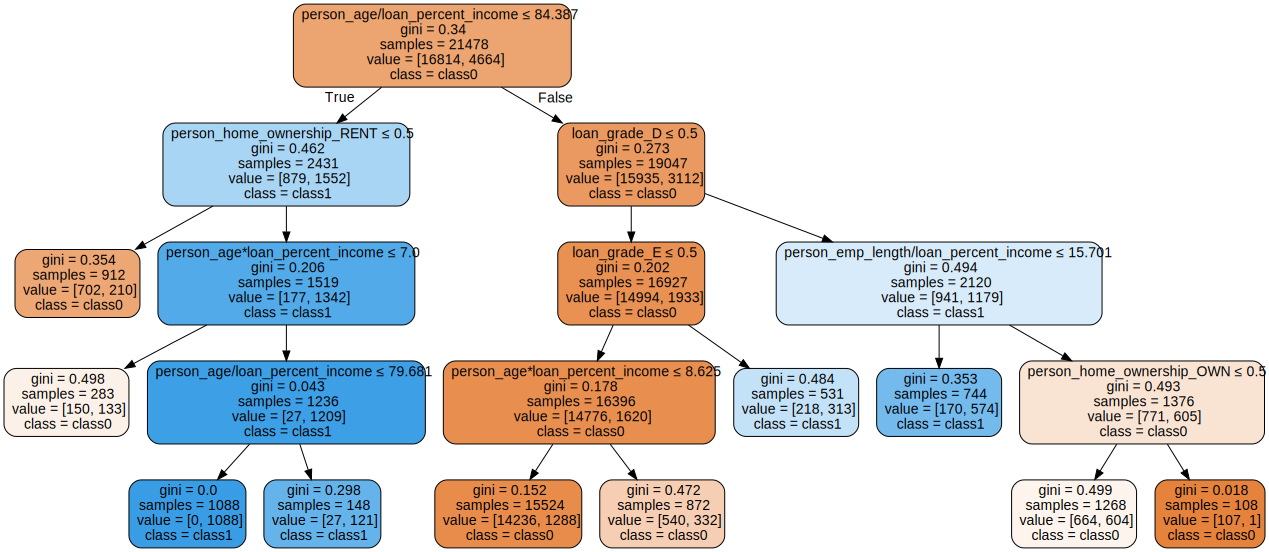

In [112]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Assuming clf is your trained DecisionTreeClassifier
# Feature names and class names should be defined as per your dataset
feature_names = X_train.columns
class_names = ['class0', 'class1']  # Adjust these based on your actual classes

# Generate a GraphViz representation of the decision tree
dot_data = export_graphviz(
    clf,
    out_file=None,  # Do not write to file, create a string object
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a graph from dot data
graph = Source(dot_data)
graph

## Convert the tree rules to text, interpert the rules and analyze them

In [120]:

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as a set of if-then statements.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

# Assume clf is your trained DecisionTreeClassifier and X_train is your feature DataFrame
tree_to_code(clf, X_train.columns)

def analyze_segments(df, rules, target_column):
    """
    Apply rules to the dataframe and calculate the proportion of bad outcomes.
    Args:
    - df (DataFrame): The dataset containing all the data.
    - rules (list of str): A list of strings where each string is a query rule.
    - target_column (str): Name of the binary target column where '1' indicates a bad loan.

    Returns:
    - DataFrame with analysis results.
    """
    results = []
    for rule in rules:
      top_features_num = ['person_age', 'person_income',
       'person_emp_length',  'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
  'cb_person_cred_hist_length',
    "loan_percent_income/cb_person_cred_hist_length",
    "person_age/loan_percent_income",
    "person_emp_length/loan_percent_income",
    "loan_int_rate/cb_person_cred_hist_length",
    "person_income/person_emp_length",
    "person_age*loan_percent_income"]
      top_features_cat = ["loan_grade", "person_home_ownership"]
      FULL_Features = top_features_cat + top_features_num + Target
      df_encoded_1  = pd.get_dummies(data=data[FULL_Features], columns = top_features_cat, drop_first = True )

      filtered_df = df_encoded_1.query(rule)
      portfolio_amount = data.loan_amnt.sum()
      total_loans = filtered_df.shape[0]
      total_loans_amount = filtered_df['loan_amnt'].sum()
      bad_loans_df = filtered_df[filtered_df[target_column] == 1]
      bad_loans_amount = bad_loans_df['loan_amnt'].sum()
      bad_loans = bad_loans_df.shape[0]
      if total_loans > 0:
          proportion = bad_loans / total_loans
          proportion_amount = bad_loans_amount / total_loans_amount if total_loans_amount > 0 else 0
          production_rate = total_loans_amount / portfolio_amount
          results.append({
                'rule': rule,
                'total_loans': total_loans,
                'bad_loans': bad_loans,
                'proportion': proportion,
                'total_loans_amount': total_loans_amount,
                'bad_loans_amount': bad_loans_amount,
                'proportion_amount': proportion_amount,
                'Production Rate' : production_rate
            })

    return pd.DataFrame(results)

# Example of using this function
rules = [
     "(person_age/loan_percent_income) <= 84.387 and (person_home_ownership_RENT) ==1 and (person_age / loan_percent_income) > 7"
]
analysis = analyze_segments(data, rules, 'loan_status')  # Assuming 'loan_status' is the target column
print(analysis)


  if person_age/loan_percent_income <= 84.39:
    if person_home_ownership_RENT <= 0.50:
      return [[702. 210.]]
    else:  # if person_home_ownership_RENT > 0.50
      if person_age*loan_percent_income <= 7.00:
        return [[150. 133.]]
      else:  # if person_age*loan_percent_income > 7.00
        if person_age/loan_percent_income <= 79.68:
          return [[   0. 1088.]]
        else:  # if person_age/loan_percent_income > 79.68
          return [[ 27. 121.]]
  else:  # if person_age/loan_percent_income > 84.39
    if loan_grade_D <= 0.50:
      if loan_grade_E <= 0.50:
        if person_age*loan_percent_income <= 8.62:
          return [[14236.  1288.]]
        else:  # if person_age*loan_percent_income > 8.62
          return [[540. 332.]]
      else:  # if loan_grade_E > 0.50
        return [[218. 313.]]
    else:  # if loan_grade_D > 0.50
      if person_emp_length/loan_percent_income <= 15.70:
        return [[170. 574.]]
      else:  # if person_emp_length/loan_percent

In [118]:

def analyze_segments(df, rules, target_column):
    """
    Apply rules to the dataframe and calculate the proportion of bad outcomes.
    Args:
    - df (DataFrame): The dataset containing all the data.
    - rules (list of str): A list of strings where each string is a query rule.
    - target_column (str): Name of the binary target column where '1' indicates a bad loan.

    Returns:
    - DataFrame with analysis results.
    """
    results = []
    for rule in rules:
        # Apply the rule as a query to filter the dataframe
        filtered_df = df_encoded.query(rule)
        portfolio_amount = data.loan_amnt.sum()
        total_loans = filtered_df.shape[0]
        total_loans_amount = filtered_df['loan_amnt'].sum()
        bad_loans_df = filtered_df[filtered_df[target_column] == 1]
        bad_loans_amount = bad_loans_df['loan_amnt'].sum()
        bad_loans = bad_loans_df.shape[0]
        if total_loans > 0:
            proportion = bad_loans / total_loans
            proportion_amount = bad_loans_amount / total_loans_amount if total_loans_amount > 0 else 0
            production_rate = total_loans_amount / portfolio_amount
            results.append({
                'rule': rule,
                'total_loans': total_loans,
                'bad_loans': bad_loans,
                'proportion': proportion,
                'total_loans_amount': total_loans_amount,
                'bad_loans_amount': bad_loans_amount,
                'proportion_amount': proportion_amount,
                'Production Rate' : production_rate
            })

    return pd.DataFrame(results)

# Example of using this function
#rules = [
#     "(person_age/loan_percent_income) <= 84.387 and (person_home_ownership_RENT) ==1 and (person_age / loan_percent_income) > 7"
#]
#analysis = analyze_segments(data, rules, 'loan_status')  # Assuming 'loan_status' is the target column
#print(analysis)


In [121]:
def tree_to_rules(tree, feature_names):
    """
    Outputs a decision tree model as a set of rules.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    rules = []

    def recurse(node, depth, current_rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_rule = f"{name} <= {threshold:.2f}"
            right_rule = f"{name} > {threshold:.2f}"

            if depth == 0:
                # Start of a new rule
                recurse(tree_.children_left[node], depth + 1, left_rule)
                recurse(tree_.children_right[node], depth + 1, right_rule)
            else:
                # Append to the existing rule
                recurse(tree_.children_left[node], depth + 1, current_rule + " and " + left_rule)
                recurse(tree_.children_right[node], depth + 1, current_rule + " and " + right_rule)
        else:
            rules.append((current_rule, tree_.value[node]))

    recurse(0, 0, "")
    return rules
rules = tree_to_rules(clf, X_train.columns)

# Filter rules that end in a leaf node with the target outcome, assuming '1' denotes bad loans
# We need to adjust how we define a 'bad' loan based on the structure of `tree_.value[node]`
bad_loan_rules = [rule for rule, values in rules if values[0][1] > values[0][0]]

# Assuming `data` is the DataFrame prepared with all necessary columns encoded appropriately
analysis = analyze_segments(data, bad_loan_rules, 'loan_status')
print(analysis)


                                                rule  total_loans  bad_loans  \
0  person_age/loan_percent_income <= 84.39 and pe...         1430       1430   
1  person_age/loan_percent_income <= 84.39 and pe...          202        166   
2  person_age/loan_percent_income > 84.39 and loa...          700        415   
3  person_age/loan_percent_income > 84.39 and loa...          969        744   

   proportion  total_loans_amount  bad_loans_amount  proportion_amount  \
0    1.000000            21940800          21940800           1.000000   
1    0.821782             2740400           2256300           0.823347   
2    0.592857             8285075           4588225           0.553794   
3    0.767802            10028925           7279025           0.725803   

   Production Rate  
0         0.079340  
1         0.009910  
2         0.029959  
3         0.036265  


# Specify the minimum criterions for the segments ( The segment's proportion of riskly files, and the production rate)

In [141]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

def train_and_filter_decision_tree(df, X_train, y_train, target, constraints, random_state=42):
    """
    Trains a decision tree model and filters segments based on provided constraints.

    Args:
    df (pd.DataFrame): The dataset.
    features (list): List of column names to be used as features.
    target (str): The target column name.
    constraints (dict): Constraints including 'min_production_rate' and 'min_risk_amount'.
    random_state (int): Random state for the decision tree training.

    Returns:
    list: Valid rules that meet the constraints.
    """
    # Train the decision tree
    clf = DecisionTreeClassifier(random_state=random_state)
    clf.fit(X_train, y_train)

    # Extract rules from the decision tree
    rules = tree_to_rules(clf, X_train.columns)

    # Filter rules based on constraints
    valid_rules = []
    for rule, values in rules:
        if rule_meets_constraints(df, rule, constraints):
            valid_rules.append(rule)

    return valid_rules

def tree_to_rules(tree, feature_names):
    """ Extracts rules from a decision tree. """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    rules = []
    def recurse(node, depth, current_rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_rule = f"{name} <= {threshold:.2f}"
            right_rule = f"{name} > {threshold:.2f}"
            if depth == 0:
                recurse(tree_.children_left[node], depth + 1, left_rule)
                recurse(tree_.children_right[node], depth + 1, right_rule)
            else:
                recurse(tree_.children_left[node], depth + 1, current_rule + " and " + left_rule)
                recurse(tree_.children_right[node], depth + 1, current_rule + " and " + right_rule)
        else:
            rules.append((current_rule, tree_.value[node]))

    recurse(0, 0, "")
    return rules

def rule_meets_constraints(df, rule, constraints):
    """ Check if a given rule meets the specified constraints. """
    top_features_num = ['person_age', 'person_income',
       'person_emp_length',  'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
  'cb_person_cred_hist_length',
    "loan_percent_income/cb_person_cred_hist_length",
    "person_age/loan_percent_income",
    "person_emp_length/loan_percent_income",
    "loan_int_rate/cb_person_cred_hist_length",
    "person_income/person_emp_length",
    "person_age*loan_percent_income"]
    top_features_cat = ["loan_grade", "person_home_ownership"]
    FULL_Features = top_features_cat + top_features_num + Target
    df_encoded_1  = pd.get_dummies(data=data[FULL_Features], columns = top_features_cat, drop_first = True )
    filtered_df = df_encoded_1.query(rule)
    total_loans_amount = filtered_df['loan_amnt'].sum()
    portfolio_amount = data['loan_amnt'].sum()
    production_rate = total_loans_amount / portfolio_amount

    bad_loans_amount = filtered_df[filtered_df['loan_status'] == 1]['loan_amnt'].sum()
    proportion_amount = bad_loans_amount / total_loans_amount if total_loans_amount > 0 else 0

    return production_rate >= constraints['min_production_rate'] and proportion_amount >= constraints['min_risk_amount']

# Example usage
target = 'loan_status'
constraints = {'min_production_rate': 0.06, 'min_risk_amount': 0.8}
valid_rules = train_and_filter_decision_tree(df_encoded, X_train, y_train, target, constraints)
print("Valid Rules:", valid_rules)


Valid Rules: ['person_age/loan_percent_income <= 84.39 and person_home_ownership_RENT > 0.50 and person_age*loan_percent_income > 7.00 and person_age/loan_percent_income <= 79.68']


In [144]:
analyze_segments(data, valid_rules, 'loan_status')

,rule,total_loans,bad_loans,proportion,total_loans_amount,bad_loans_amount,proportion_amount,Production Rate
0,person_age/loan_percent_income <= 84.39 and pe...,1430,1430,1.0,21940800,21940800,1.0,0.07934
